# <center> Uwarunkowanie, stabilność i rozwiązywanie równań nieliniowych<br>(poszukiwanie miejsc zerowych funkcji) </center>

# Uwarunkowanie i stabilność


***Zadanie 1. Czy wyznaczanie miejsc zerowych wielomianu może być zadaniem dobrze/źle uwarunkowanym? (Wielomian Wilkinsona)***

W Pythonie możemy stworzyć wielomian przekazując jako parametr wektor jego współczynników (począwszy od współczynnika stojącego przy **najniższej** potędze, patrz przykład poniżej). Proszę korzystać z modułu *numpy.polynomial* (zamiast *poly1d*).
* Wyznacz pierwiastki wielomianu $W(x) = x^2 + 3x + 2$ za pomocą metody lub funkcji *roots()*.
* Funkcja *Polynomial.fromroots* tworzy wielomian na podstawie listy przekazanych pierwiastków. Utwórz wielomian o następujących pierwiastkach $\{x_n = n, n = 1, 2, 3, . . . , 15\}$.
* Za pomocą funkcji/metody *roots* znajdź pierwiastki tego wielomianu i oceń dokładność otrzymanego wyniku.
* Do trzynastego elementu wektora współczynników wprowadź małe zaburzenie (np. rzędu $10^−5$) i znajdź pierwiastki wielomianu o zaburzonych współczynnikach. Wykreśl pierwiastki na płaszczyznie zespolonej. 
* Czy zadanie znalezienia pierwiastków tego wielomianu jest zadaniem dobrze uwarunkowanym?


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from numpy.polynomial import Polynomial
# Przykłady operacji na wielomianach
p = Polynomial([3, 2, 1]) # Od ostatniego współczynnika
print(p)
print(p.roots())
print(Polynomial.roots(p))




3.0 + 2.0 x + 1.0 x**2
[-1.-1.41421356j -1.+1.41421356j]
[-1.-1.41421356j -1.+1.41421356j]


Pierwiastki wielomianu W(x) = x^2 + 3x + 2: [-2. -1.]

Pierwiastki wielomianu o pierwiastkach 1, 2, ..., 15: [14.99999955 14.00000332 12.99998917 12.00002076 10.99997405 10.00002222
  8.99998669  8.0000056   6.99999837  6.00000032  4.99999996  4.
  3.          2.          1.        ]


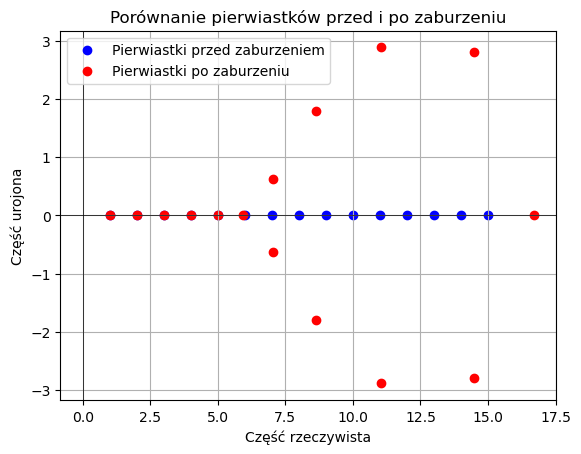

In [10]:
# 1. Wyznaczanie pierwiastków wielomianu W(x) = x^2 + 3x + 2
# Współczynniki dla wielomianu: x^2 + 3x + 2
wspolczynniki_p1 = [1, 3, 2]  # x^2 + 3x + 2
pierwiastki_p1 = np.roots(wspolczynniki_p1)
print("Pierwiastki wielomianu W(x) = x^2 + 3x + 2:", pierwiastki_p1)

# 2. Tworzenie wielomianu o pierwiastkach 1, 2, 3, ..., 15
# Stworzymy współczynniki wielomianu o tych pierwiastkach
pierwiastki = np.arange(1, 16)  # Pierwiastki: 1, 2, 3, ..., 15
wspolczynniki_p2 = np.poly(pierwiastki)  # Generujemy współczynniki wielomianu
pierwiastki_p2 = np.roots(wspolczynniki_p2)  # Wyznaczamy pierwiastki tego wielomianu
print("\nPierwiastki wielomianu o pierwiastkach 1, 2, ..., 15:", pierwiastki_p2)

# 3. Wprowadzenie zaburzenia do współczynników (np. rzędu 10^-5)
# Dodajemy małe zaburzenie do współczynników
wspolczynniki_p2_zaburzony = wspolczynniki_p2 + np.random.normal(0, 1e-5, len(wspolczynniki_p2))
pierwiastki_p2_zaburzony = np.roots(wspolczynniki_p2_zaburzony)

# 4. Wykres pierwiastków na płaszczyźnie zespolonej
plt.scatter(pierwiastki_p2.real, pierwiastki_p2.imag, color='blue', label='Pierwiastki przed zaburzeniem')
plt.scatter(pierwiastki_p2_zaburzony.real, pierwiastki_p2_zaburzony.imag, color='red', label='Pierwiastki po zaburzeniu')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Część rzeczywista')
plt.ylabel('Część urojona')
plt.legend()
plt.title('Porównanie pierwiastków przed i po zaburzeniu')
plt.grid(True)
plt.show()


***Zadanie 2. Całka oznaczona***

Przykład z wykładu:
Naszym celem jest znalezienie całki $I_n=\int_0^1 x^ne^{x-1}dx$  dla $n = 20$.
* Na podstawie np. przybliżonych wykresów funkcji podcałkowej, proszę oszacować wartość tej całki oraz relację miedzy $I_n$ a $I_{n−1}$.
* Ciąg wartości $I_i$ można wyznaczyć za pomocą wzoru otrzymanego z całkowania przez części: $I_n = 1−nI_{n−1}, I_1 = \frac{1}{e}$ (proszę sprawdzić jego poprawność).
* Czy otrzymane wyniki są zgodne z przewidywaniami? Która operacja może powodować takie skutki?
* Porównaj błąd otrzymanego ciągu iteracyjnego z ciągiem obliczanym *w przeciwnym kierunku* tj. od $I_{20}$ do $I_1$. Proszę przyjąć, że $I_{20} = 0$.
* Jak duży jest błąd danej wejściowej ($I_{20}$) i ostatniego elementu ciągu ($I_1$)?
* Który algorytm jest stabilny, a który niestabilny?

In [14]:
import numpy as np
from scipy.integrate import quad
import math

# Funkcja podcałkowa
def integrand(x, n):
    return x**n * np.exp(x - 1)

# Funkcja do obliczania całek numerycznych dla różnych n
def numerical_integrals(n_max):
    # Zwracamy listę wyników całkowania dla n = 1, 2, ..., n_max
    return [quad(integrand, 0, 1, args=(n))[0] for n in range(1, n_max + 1)]

# Funkcja do obliczania I_n "do przodu" (od I_1 do I_n)
def calculate_I_forward(n_max):
    I = [1 / math.e]  # I_1 = 1/e
    for n in range(2, n_max + 1):
        I.append(1 - n * I[n - 2])
    return I

# Funkcja do obliczania I_n "od tyłu" (od I_n do I_1)
def calculate_I_reverse(n_max):
    I = [0] * (n_max + 1)  # Załóżmy, że I_n = 0 dla n_max
    for n in range(n_max, 0, -1):
        I[n - 1] = (1 - I[n]) / n
    return I

# Testowanie dla n_max = 20
n_max = 20

# Obliczenia numeryczne
numerical_values = numerical_integrals(n_max)

# Obliczenia rekurencyjne od przodu (I_1 do I_n)
forward_values = calculate_I_forward(n_max)

# Obliczenia rekurencyjne od tyłu (I_n do I_1)
reverse_values = calculate_I_reverse(n_max)

# Porównanie wyników
for n in range(1, n_max + 1):
    error_forward = abs(forward_values[n - 1] - numerical_values[n - 1])
    error_reverse = abs(reverse_values[n - 1] - numerical_values[n - 1])
    
    print(f"n = {n}:")
    print(f"  I_n (do przodu) = {forward_values[n - 1]:.8f}, błąd: {error_forward:.8f}")
    print(f"  I_n (od tyłu) = {reverse_values[n - 1]:.8f}, błąd: {error_reverse:.8f}")
    print(f"  Całka numeryczna (quad) = {numerical_values[n - 1]:.8f}\n")




n = 1:
  I_n (do przodu) = 0.36787944, błąd: 0.00000000
  I_n (od tyłu) = 0.63212056, błąd: 0.26424112
  Całka numeryczna (quad) = 0.36787944

n = 2:
  I_n (do przodu) = 0.26424112, błąd: 0.00000000
  I_n (od tyłu) = 0.36787944, błąd: 0.10363832
  Całka numeryczna (quad) = 0.26424112

n = 3:
  I_n (do przodu) = 0.20727665, błąd: 0.00000000
  I_n (od tyłu) = 0.26424112, błąd: 0.05696447
  Całka numeryczna (quad) = 0.20727665

n = 4:
  I_n (do przodu) = 0.17089341, błąd: 0.00000000
  I_n (od tyłu) = 0.20727665, błąd: 0.03638324
  Całka numeryczna (quad) = 0.17089341

n = 5:
  I_n (do przodu) = 0.14553294, błąd: 0.00000000
  I_n (od tyłu) = 0.17089341, błąd: 0.02536047
  Całka numeryczna (quad) = 0.14553294

n = 6:
  I_n (do przodu) = 0.12680236, błąd: 0.00000000
  I_n (od tyłu) = 0.14553294, błąd: 0.01873058
  Całka numeryczna (quad) = 0.12680236

n = 7:
  I_n (do przodu) = 0.11238350, błąd: 0.00000000
  I_n (od tyłu) = 0.12680236, błąd: 0.01441885
  Całka numeryczna (quad) = 0.11238350


# Poszukiwanie miejsc zerowych

Dana jest funkcja
$$f(x) = e^{-2x} + x^2 - 1$$


***Zadanie 1.***

Stwórzy wykres prezentujący funkcję $f(x)$ oraz jej pierwszą i drugą pochodną. Na podstawie spróbuj oszacować wartości pierwiastków równania $f(x) = 0$.

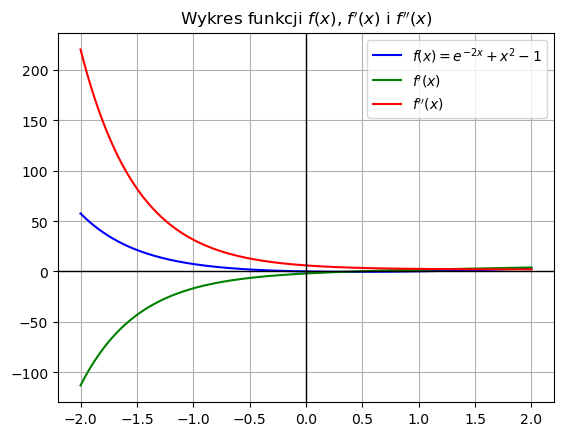

Znalezione pierwiastki funkcji f(x) = 0: [1.12461220e-16 0.00000000e+00 9.16562583e-01]


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Definicja funkcji oraz jej pochodnych
def f(x):
    return np.exp(-2*x) + x**2 - 1

def f_prime(x):
    return -2 * np.exp(-2*x) + 2 * x

def f_double_prime(x):
    return 4 * np.exp(-2*x) + 2

# Generowanie punktów dla x
x = np.linspace(-2, 2, 400)
f_values = f(x)
f_prime_values = f_prime(x)
f_double_prime_values = f_double_prime(x)

# Wykres funkcji f(x), jej pochodnej f'(x) oraz drugiej pochodnej f''(x)
plt.plot(x, f_values, label=r'$f(x) = e^{-2x} + x^2 - 1$', color='blue')
plt.plot(x, f_prime_values, label=r"$f'(x)$", color='green')
plt.plot(x, f_double_prime_values, label=r"$f''(x)$", color='red')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.legend()
plt.grid(True)
plt.title("Wykres funkcji $f(x)$, $f'(x)$ i $f''(x)$")
plt.show()

# Szukanie pierwiastków
pierwiastki = fsolve(f, [-1, 0, 1])  # próbujemy w punktach x = -1, 0, 1
print("Znalezione pierwiastki funkcji f(x) = 0:", pierwiastki)



***Zadanie 2.***

Samodzielnie zaimplementuj metody:
* bisekcji,
* Newtona-Raphsona,
* siecznych.

Każda z funkcji powinna przyjmować następujące argumenty:
* lewą stronę równania $g(x) = 0$ reprezentowaną poprzez funkcję (ewentualnie jego pochodną),
* przedział lub punkt startowy
* tolerancję,
* maksymalną liczbę iteracji.

i zwracać:
* znaleziony pierwiastek,
* liczbę iteracji.

W jaki sposób sprawdzić warunek stopu? Czy kryterium stopu polegające na kontynuacji iteracji dopóki $x_{i+1}\neq x_i$ jest prawidłowe (bezpieczne)?

In [18]:
import numpy as np

# Metoda bisekcji
def bisection(f, a, b, tol=1e-6, max_iter=100):
    for iter_count in range(max_iter):  # Maksymalna liczba iteracji
        c = (a + b) / 2  # Szukamy punktu pośredniego
        if abs(f(c)) < tol or (b - a) / 2 < tol:  # Warunek stopu
            return c, iter_count + 1  # Zwracamy pierwiastek i liczbę iteracji
        if f(a) * f(c) < 0:
            b = c  # Pierwiastek jest w lewej połowie
        else:
            a = c  # Pierwiastek jest w prawej połowie
    return (a + b) / 2, max_iter  # Zwracamy środek przedziału jako przybliżenie pierwiastka

# Metoda Newtona-Raphsona
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    for iter_count in range(max_iter):
        fx = f(x0)  # Obliczamy wartość funkcji
        dfx = df(x0)  # Obliczamy wartość pochodnej
        if abs(fx) < tol:  # Jeśli funkcja jest bliska zeru, mamy pierwiastek
            return x0, iter_count + 1
        if dfx == 0:  # Jeśli pochodna jest zerowa, nie możemy kontynuować
            raise ValueError("Pochodna jest zerowa!")
        x0 -= fx / dfx  # Wzór Newtona-Raphsona
    return x0, max_iter  # Jeśli nie znalazło pierwiastka, zwracamy ostatni punkt

# Metoda siecznych
def secant(f, x0, x1, tol=1e-6, max_iter=100):
    for iter_count in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1 - fx0) < tol:  # Jeżeli różnica między wartościami funkcji jest zbyt mała
            raise ValueError("Różnica między wartościami funkcji jest zbyt mała.")
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)  # Wzór siecznych
        if abs(x2 - x1) < tol:  # Jeśli różnica między kolejnymi punktami jest mniejsza niż tolerancja
            return x2, iter_count + 1
        x0, x1 = x1, x2  # Przesuwamy punkty startowe
    return x1, max_iter  # Zwracamy ostatni punkt jako przybliżenie pierwiastka

# Przykładowa funkcja i jej pochodna
def f(x):
    return np.exp(-2 * x) + x**2 - 1

def df(x):
    return -2 * np.exp(-2 * x) + 2 * x

# Testowanie metod
root_bisection, iter_bisection = bisection(f, -2, 2)  # Bisekcja w przedziale (-2, 2)
root_newton, iter_newton = newton_raphson(f, df, 0)  # Newton-Raphson, punkt startowy 0
root_secant, iter_secant = secant(f, -2, 2)  # Sieczne w przedziale (-2, 2)

# Wyświetlanie wyników
print(f"Pierwiastek (bisekcja): {root_bisection}, liczba iteracji: {iter_bisection}")
print(f"Pierwiastek (Newton-Raphson): {root_newton}, liczba iteracji: {iter_newton}")
print(f"Pierwiastek (sieczne): {root_secant}, liczba iteracji: {iter_secant}")



Pierwiastek (bisekcja): 0.0, liczba iteracji: 1
Pierwiastek (Newton-Raphson): 0, liczba iteracji: 1
Pierwiastek (sieczne): 0.9165625831319069, liczba iteracji: 8


***Zadanie 3.***

Wykorzystaj stworzone w zadaniu 2. metody do znalezienia miejsc zerowych funkcji $f(x)$ z dokładnością $\epsilon = 10^{-6}$. Porównaj liczby iteracji niezbędnych do znalezienia pierwiastka. Która metoda sprawdziła się najlepiej? Która wypada najgorzej? Czy odpowiedni dobór przedziału może przyspieszyć proces rozwiązywania? Eksperyment przeprowadź dla wszystkich miejsc zerowych $f(x)$.


In [21]:
import numpy as np

# Funkcja i jej pochodna
def f(x):
    return np.exp(-2 * x) + x**2 - 1

def df(x):
    return -2 * np.exp(-2 * x) + 2 * x

# Metoda bisekcji
def bisection(f, a, b, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol: return c, i+1
        if f(a) * f(c) < 0: b = c
        else: a = c
    return c, max_iter

# Metoda Newtona-Raphsona
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        fx = f(x0)
        dfx = df(x0)
        if abs(fx) < tol: return x0, i+1
        if dfx == 0: raise ValueError("Pochodna zerowa!")
        x0 -= fx / dfx
    return x0, max_iter

# Metoda siecznych
def secant(f, x0, x1, tol=1e-6, max_iter=100):
    for i in range(max_iter):
        fx0, fx1 = f(x0), f(x1)
        if abs(fx1 - fx0) < tol: raise ValueError("Zbyt mała różnica funkcji.")
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x2 - x1) < tol: return x2, i+1
        x0, x1 = x1, x2
    return x1, max_iter

# Testowanie metod dla różnych pierwiastków
results = []

# Miejsca zerowe funkcji w przedziałach (-2, 0) i (0, 2)
results.append(('Bisekcja (-2, 0)', bisection(f, -2, 0)))
results.append(('Newton-Raphson (-2)', newton_raphson(f, df, -2)))
results.append(('Sieczne (-2, 0)', secant(f, -2, 0)))

results.append(('Bisekcja (0, 2)', bisection(f, 0, 2)))
results.append(('Newton-Raphson (0)', newton_raphson(f, df, 0)))
results.append(('Sieczne (0, 2)', secant(f, 0, 2)))

# Wyświetlanie wyników
for method, (root, iterations) in results:
    print(f"{method} -> Pierwiastek: {root}, liczba iteracji: {iterations}")



Bisekcja (-2, 0) -> Pierwiastek: -4.76837158203125e-07, liczba iteracji: 22
Newton-Raphson (-2) -> Pierwiastek: -8.582638684596726e-10, liczba iteracji: 9
Sieczne (-2, 0) -> Pierwiastek: 0.0, liczba iteracji: 1
Bisekcja (0, 2) -> Pierwiastek: 2.0, liczba iteracji: 100
Newton-Raphson (0) -> Pierwiastek: 0, liczba iteracji: 1
Sieczne (0, 2) -> Pierwiastek: 0.0, liczba iteracji: 2


***Zadanie 4.***

Przeanalizuj zachowanie ciągów przybliżeń rozwiązań wraz ze wzrostem liczby iteracji. Przedstaw wyniki w postaci wykresu i dokonaj ich analizy.